In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
except ModuleNotFoundError:
    pass
else:
    pass

Mounted at /content/drive


In [3]:
filepath = '/content/drive/Othercomputers/My Laptop/data-science-assignments/07 - Logistic Regression Regularization/'
filename = 'abalone.data'
filepathname = filepath + filename

In [4]:
df = pd.read_csv(filepathname, header = 0)
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df['Sex'].value_counts(normalize = True)

M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

1.   It appears dataset is balanced.

In [7]:
#Dropping all rows/records with sex of I
df = df.loc[df['Sex']!='I']

In [8]:
y = df.loc[:,'Sex'].values
X = df.drop(columns = ['Sex'])

In [9]:
y.shape

(2835,)

In [10]:
X.shape

(2835, 8)

In [11]:
#Setting number to use for random state
rs_num = 42

In [12]:
#Splitting X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rs_num)

In [13]:
#Making column selectors
num_selector = make_column_selector(dtype_include="number")

2.  Attempting to scale data below.

In [14]:
#Instantiating the scaler
scaler = StandardScaler()

In [15]:
#imputting scaler tuple
scaler_tuple = (scaler, num_selector)

In [16]:
#Instantiating the column transformer
column_transformer = make_column_transformer(scaler_tuple)

In [17]:
def calculate_model(X_train, X_test, y_train, y_test, reg_type, my_title, gen_cm=False):
    global column_transformer
    global true_neg, false_pos, false_neg, true_pos

    pipe = make_pipeline(column_transformer, reg_type)
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    if gen_cm == True:
        predictions = pipe.predict(X_test)
        my_confusion_matrix = metrics.confusion_matrix(y_test, predictions)
        true_neg, false_pos, false_neg, true_pos = my_confusion_matrix.ravel()
        disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap = 'Blues')
        disp.ax_.set_title(my_title)
        plt.show()
    return score, true_neg, false_pos, false_neg, true_pos

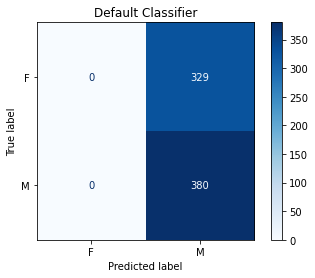

3. Accuracy of default model is: 0.5360


In [18]:
my_classifier = DummyClassifier()
temp = calculate_model(X_train, X_test, y_train, y_test, my_classifier, "Default Classifier", True)
print("3. Accuracy of default model is: {0:,.4f}".format(temp[0]))

In [19]:
max_knn_score = 0
counter = 1
for n in range(1,110):
    my_classifier = KNeighborsClassifier(n_neighbors=n)
    m_title = str(n) + "Nearest Neighbor Classifier"
    temp = calculate_model(X_train, X_test, y_train, y_test, my_classifier, m_title,False)
    if temp[0] > max_knn_score :
        max_knn_score = temp[0]
        max_knn_counter = counter + 1
    counter += 1

In [20]:
print("4. Optimal accuruacy is K tuned to: {0:,.0f} with a score of {1:,.4f}".format(max_knn_counter, max_knn_score))

4. Optimal accuruacy is K tuned to: 49 with a score of 0.5769


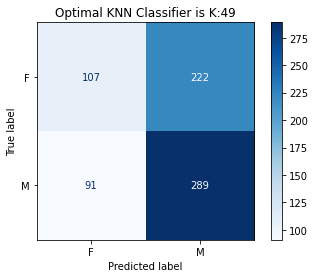

Confusion Matrix with score: 0.5769, True Negative: 107, False Positive: 222, False Negative: 91, True Positive: 289


In [21]:
my_classifier = KNeighborsClassifier(n_neighbors=max_knn_counter)
m_title = "Optimal KNN Classifier is K:" + str(max_knn_counter)
temp = calculate_model(X_train, X_test, y_train, y_test, my_classifier, m_title, True)
print("Confusion Matrix with score: {0:,.4f}, True Negative: {1:,.0f}, False Positive: {2:,.0f}, False Negative: {3:,.0f}, True Positive: {4:,.0f}".format(max_knn_score, temp[1],temp[2],temp[3],temp[4]))